# Supervised Learning Project
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of
customers who are also borrowers (asset customers) is quite small, and the bank is interested
in expanding this base rapidly to bring in more loan business and in the process, earn more
through the interest on loans. In particular, the management wants to explore ways of
converting its liability customers to personal loan customers (while retaining them as
depositors). A campaign that the bank ran last year for liability customers showed a healthy
conversion rate of over 9% success. This has encouraged the retail marketing department to
devise campaigns with better target marketing to increase the success ratio with minimal
budget.

The department wants to build a model that will help them identify the potential customers
who have higher probability of purchasing the loan. This will increase the success ratio while
at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage,
securities account, etc.), and the customer response to the last personal loan campaign
(Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan
that was offered to them in the earlier campaign.

# Data Description:

ID - Customer ID

Age - Customer's age in completed years

Experience - years of professional experience

Income - Annual income of the customer ($000)

ZIPCode - Home Address ZIP code.

Family - Family size of the customer

CCAvg - Avg. spending on credit cards per month ($000)

Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage - Value of house mortgage if any. ($000)

Personal Loan - Did this customer accept the personal loan offered in the last campaign?

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

Online - Does the customer use internet banking facilities?

CreditCard - Does the customer use a credit card issued by UniversalBank?

# Question 1. Read the column description and ensure you understand each attribute well ( 2points)

In [1814]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [1815]:
#Read the data set 
bank_df = pd.read_csv("C:\\Users\\srivi\\Downloads\\Bank_Personal_Loan_Modelling-1.csv")

In [1816]:
#Printing first 5 records to see if data is read correctly
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [1817]:
bank_df[bank_df.duplicated()==True]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# Insight:
There are no duplicate values in data set

In [1818]:
print(bank_df.shape)

(5000, 14)


# Insight:
There are 5000 customer records and 14 columns

Independent variabes - ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard

Target variable - Personal Loan ( 0 - liability customer , 1 - borrowers)

In [1819]:
bank_df.isnull().sum().any()

False

# Insight:
There are no missing values in data frame

In [1820]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Insight:
All the columns are numeric and there are no object data type in data frame. But zipcode should be considered as object as it represents address.

In [1821]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [1822]:
print("Unique values in Family             - ",bank_df.Family.unique())
print("Unique values in Education          - ",bank_df.Education.unique())
print("Unique values in Securities Account - ",bank_df['Securities Account'].unique())
print("Unique values in CD Account         - ",bank_df['CD Account'].unique())
print("Unique values in Online             - ",bank_df['Online'].unique())
print("Unique values in CreditCard         - ",bank_df['CreditCard'].unique())
print("Unique values in Personal Loan      - ",bank_df['Personal Loan'].unique())


Unique values in Family             -  [4 3 1 2]
Unique values in Education          -  [1 2 3]
Unique values in Securities Account -  [1 0]
Unique values in CD Account         -  [0 1]
Unique values in Online             -  [0 1]
Unique values in CreditCard         -  [0 1]
Unique values in Personal Loan      -  [0 1]


# Insight:
From above we can see the range of values in each column from min and max

Id - min is 1 and max is 5000, ie there are 5000 customer data. This is just id and this feature should be dropped from the data set.

Age - min age is 23 and max is 67 and mean age is 45 - Continuous

Experiance - we can see experience here goes to negative which needs to be handled later - Continuous

Income - lowest income is 8$ and highest income is 224$ and mean income is 73$ - Continuous

Zip code - here min max mean and other description is not quiet valid as it represents address 

Family - there is min 1 member in family and max 4 members in family and avg of 2 - Discrete and take 4 values [1 2 3 4]

CCAvg - average credit card usage, min zero$ and max 10$ - Continuous

Education - education level - discrete and takes 3 values [1 2 3] 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage - value of mortgage taken by customer min 0$ and max 635$ - Continuous

Securities Account - Yes/No Does customer have securities account - Discrete and take 2 values [0 1]	

CD Account - Does customer have certificate of deposit - Discrete and takes 2 values [0 1]

Online -  does the customer use internet banking - Discrete and takes 2 values [0 1]

CreditCard - Does the customer have credit card - Discrete and takes 2 values [0 1]

Personal Loan - this is the target variables and it has two classes ( 0 - liability customer , 1 - borrowers)

Age, Experience, Income, Mortgage and CCAvg are continuous variables. Zipcode is not quantifiable variable, it should be handled  using one hot encoding. Personal loan is a target variable with two classes. all the other variables are discrete variables.

# Question 2 : Study the data distribution in each attribute, share your findings

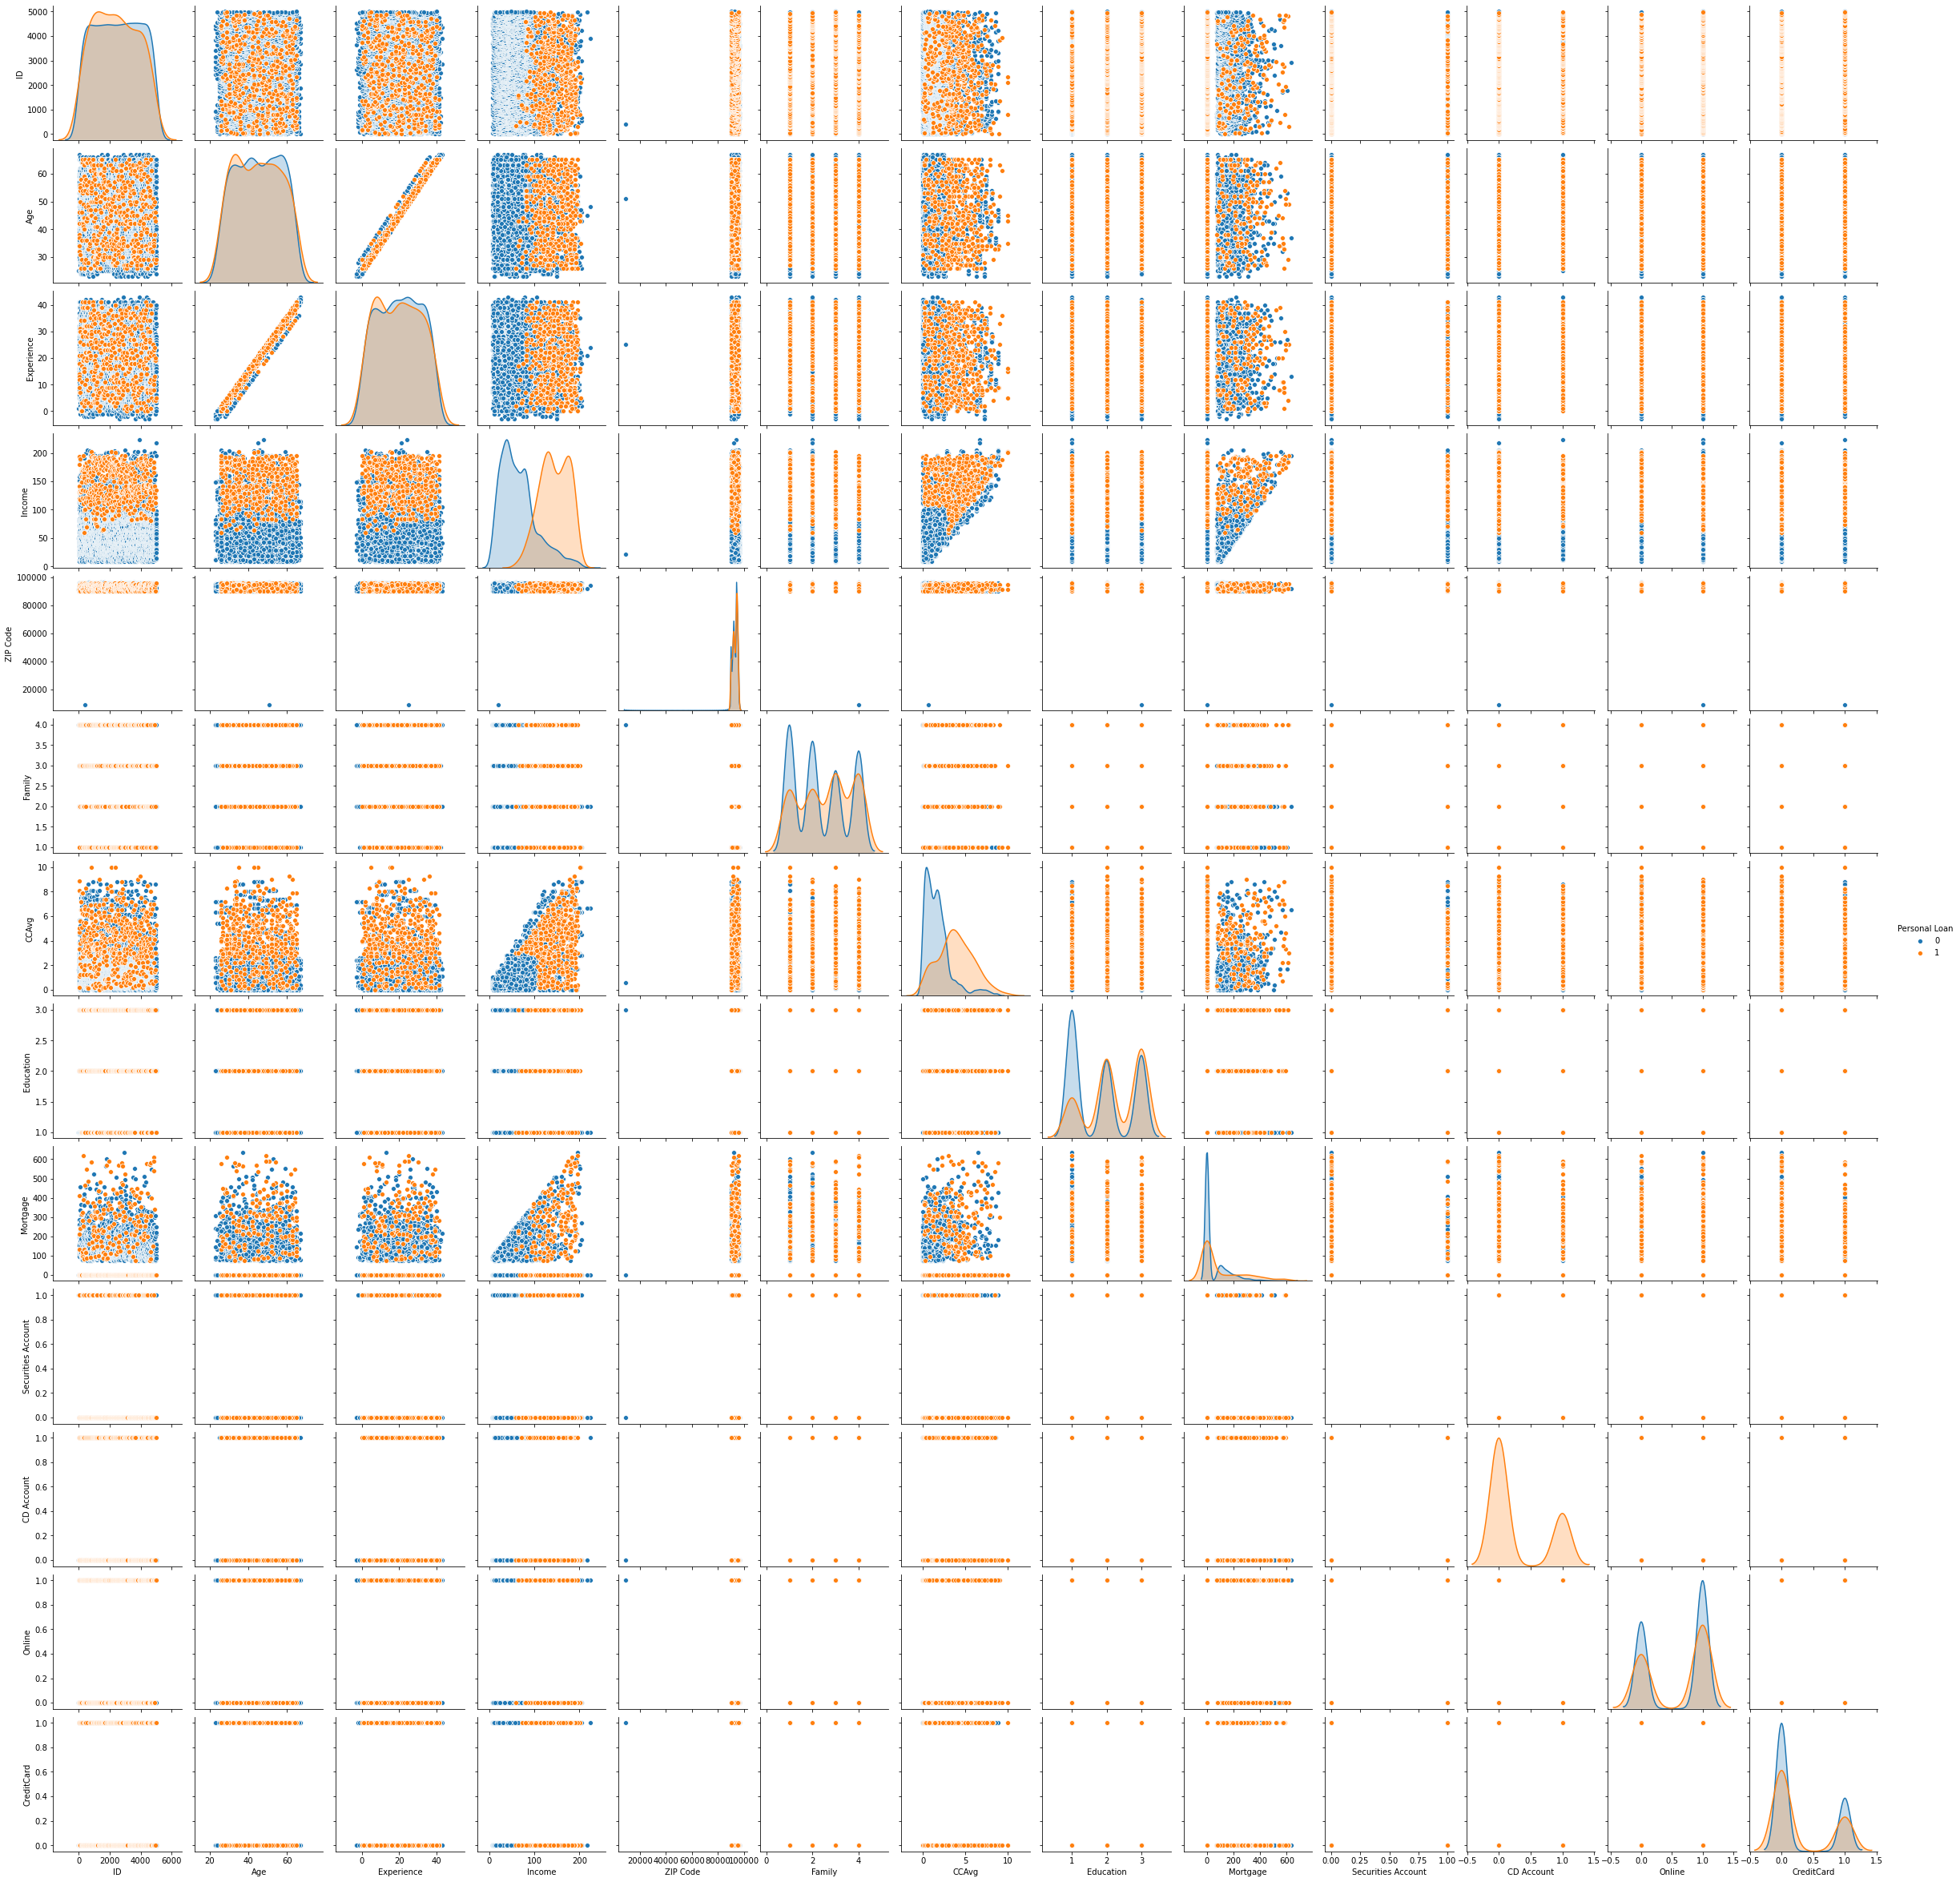

In [1823]:
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data=bank_df, hue="Personal Loan")


# Insight:
We can clearly see that income is the best feature because it shows differences clearly for personal loan classes

Measure of skewness of Age: -0.02934068151284029
ShapiroResult(statistic=0.9618571400642395, pvalue=2.251294612491604e-34)


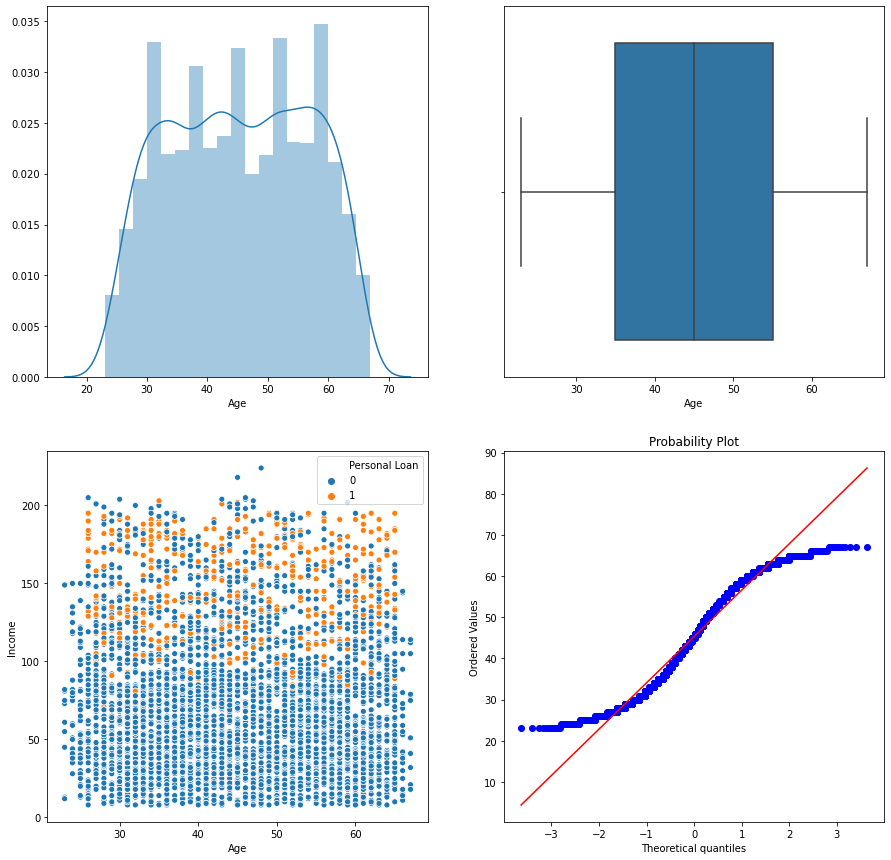

In [1824]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(bank_df['Age'] , ax=axes[0,0])
sns.boxplot(x=bank_df['Age'], ax=axes[0,1])
sns.scatterplot(data=bank_df, x="Age", y="Income", ax=axes[1,0], hue="Personal Loan")
stats.probplot(bank_df['Age'], dist="norm", plot=pylab)
print("Measure of skewness of Age:",bank_df.Age.skew())
print(stats.shapiro(bank_df.Age))


# Insight:
Distribution of Age:

From dist plot and probability plot we see that the distribution is not normal.

Box Plot shows there are no outliers.

scatter plot shows borrowers are high income people in all age range.

Measure of skewness says the distribution is slightly left skewed

From the shapiro test, since p value is less than 0.05 we reject null and hence distribution is not normal


Measure of skewness of Experience : -0.026324688402384513
ShapiroResult(statistic=0.9647439122200012, pvalue=2.7664328334671494e-33)


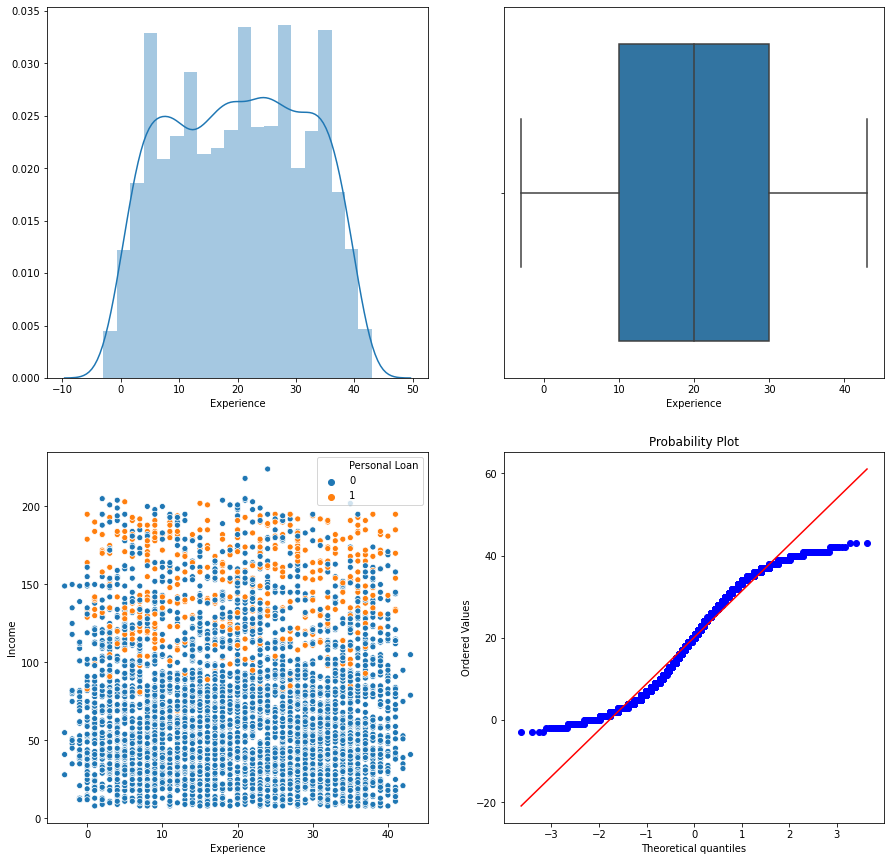

In [1825]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(bank_df['Experience'] , ax=axes[0,0])
sns.boxplot(x=bank_df['Experience'], ax=axes[0,1])
sns.scatterplot(data=bank_df, x="Experience", y="Income", ax=axes[1,0], hue="Personal Loan")
stats.probplot(bank_df['Experience'], dist="norm", plot=pylab)
print("Measure of skewness of Experience :",bank_df.Experience.skew())
print(stats.shapiro(bank_df.Experience))

# Insight:
Distribution of experience:

From dist plot and probability plot we see the distribution is not normal and experience goes negative.

Box Plot shows there are no outliers.

scatter plot shows borrowers are high income people in all experience.

Measure of skewness says the distribution is slightly left skewed

From the shapiro test, since p value is less than 0.05 we reject null and hence distribution is not normal


Measure of skewness of CCAvg : 1.5984433366678663
ShapiroResult(statistic=0.9647439122200012, pvalue=2.7664328334671494e-33)


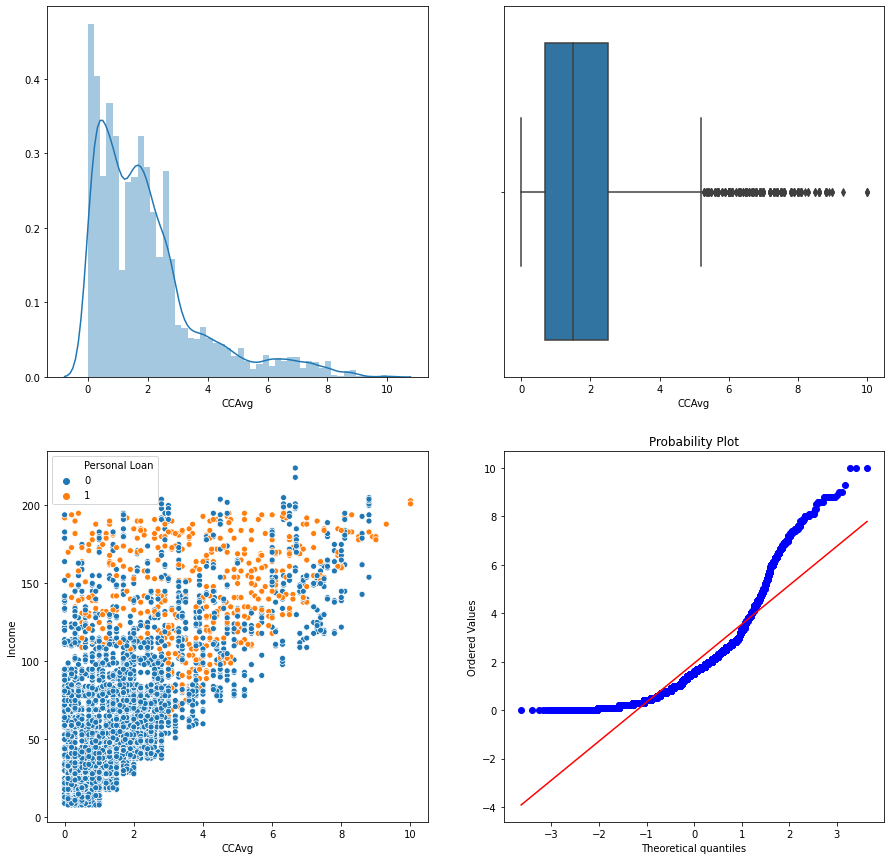

In [1826]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(bank_df['CCAvg'] , ax=axes[0,0])
sns.boxplot(x=bank_df['CCAvg'], ax=axes[0,1])
sns.scatterplot(data=bank_df, x="CCAvg", y="Income", ax=axes[1,0], hue="Personal Loan")
stats.probplot(bank_df['CCAvg'], dist="norm", plot=pylab)
print("Measure of skewness of CCAvg :",bank_df.CCAvg.skew())
print(stats.shapiro(bank_df.Experience))

# Insight:
Distribution of CCAvg:

From dist plot and probability plot we see the distribution is not normal.

Box Plot shows there are outliers.

scatter plot shows borrowers are high income people and ccavg increases with income.

Measure of skewness says the distribution is right skewed

From the shapiro test, since p value is less than 0.05 we reject null and hence distribution is not normal


Measure of skewness of Income : 0.8413386072610816
ShapiroResult(statistic=0.9282413721084595, pvalue=8.688050478813866e-44)


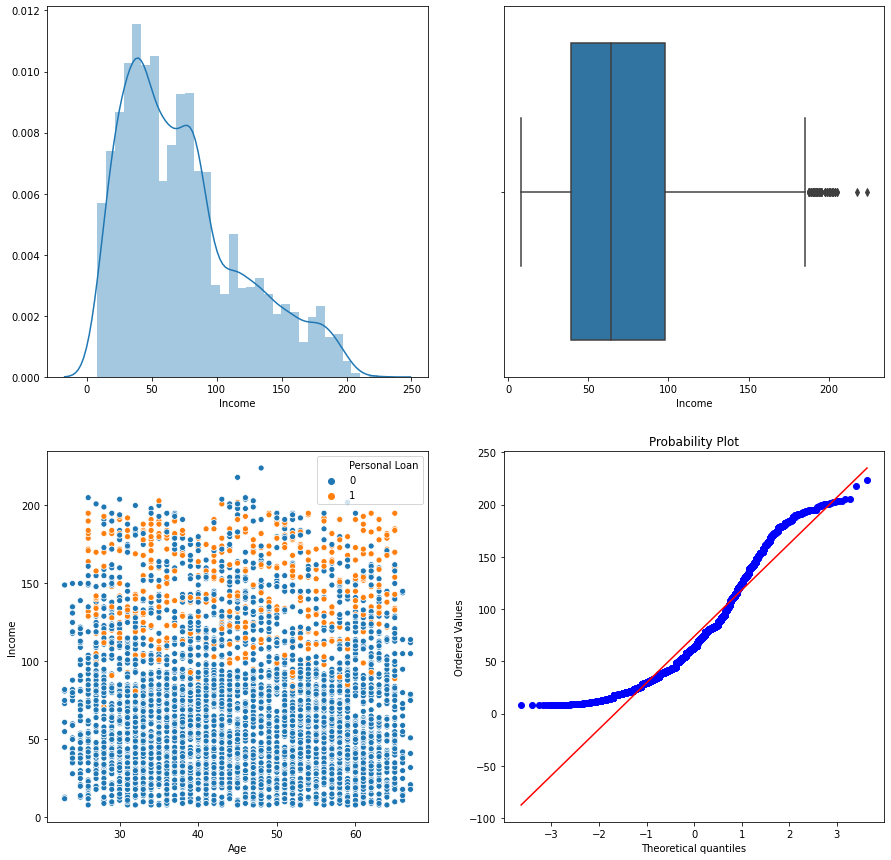

In [1827]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(bank_df['Income'] , ax=axes[0,0])
sns.boxplot(x=bank_df['Income'], ax=axes[0,1])
sns.scatterplot(data=bank_df, x="Age", y="Income", ax=axes[1,0], hue="Personal Loan")
stats.probplot(bank_df['Income'], dist="norm", plot=pylab)
print("Measure of skewness of Income :",bank_df.Income.skew())
print(stats.shapiro(bank_df.Income))

# Insight:
Distribution of income:

From dist plot and probability plot we see the distribution is not normal.

Box Plot shows there are outliers.

scatter plot shows borrowers are high income people.

Measure of skewness says the distribution is right skewed

From the shapiro test, since p value is less than 0.05 we reject null and hence distribution is not normal


Measure of skewness of Mortgage : 2.1040023191079444
ShapiroResult(statistic=0.6281886696815491, pvalue=0.0)


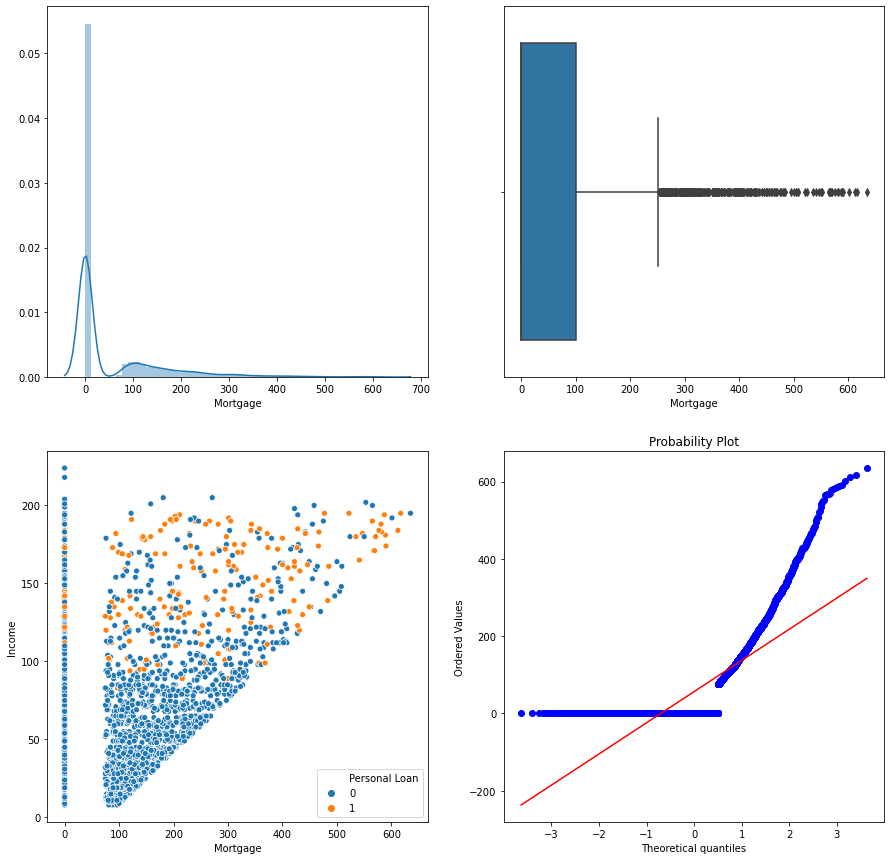

In [1828]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(bank_df['Mortgage'] , ax=axes[0,0])
sns.boxplot(x=bank_df['Mortgage'], ax=axes[0,1])
sns.scatterplot(data=bank_df, x="Mortgage", y="Income", ax=axes[1,0], hue="Personal Loan")
stats.probplot(bank_df['Mortgage'], dist="norm", plot=pylab)
print("Measure of skewness of Mortgage :",bank_df.Mortgage.skew())
print(stats.shapiro(bank_df.Mortgage))

# Insight:
Distribution of mortgage:

From dist plot and probability plot we see the distribution is not normal and distplot skows high peak fot mortgage 0. There are many people with 0 mortgage.

Box Plot shows there are outliers.

scatter plot shows borrowers are high income people and mortgage increases with income.

Measure of skewness says the distribution is right skewed

From the shapiro test, since p value is less than 0.05 we reject null and hence distribution is not normal

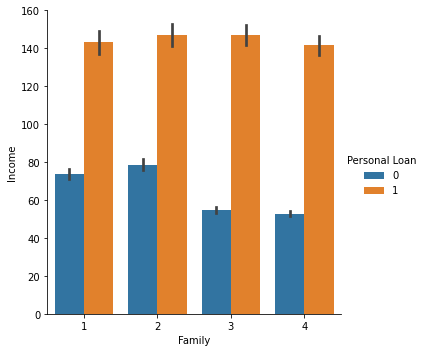

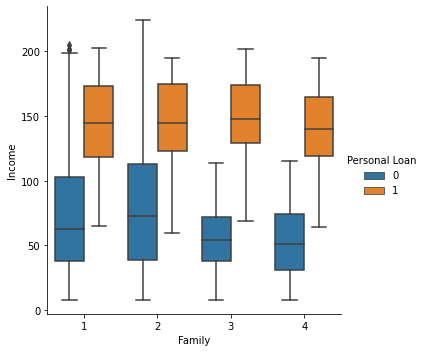

In [1829]:
sns.catplot(data=bank_df, kind="bar", x="Family", y="Income", hue="Personal Loan")
sns.catplot(data=bank_df, kind="box", x="Family", y="Income", hue="Personal Loan")

# Insight:
From the above distribution of family we see that the loan borrowed from the bank is almost same for any no. of family members.


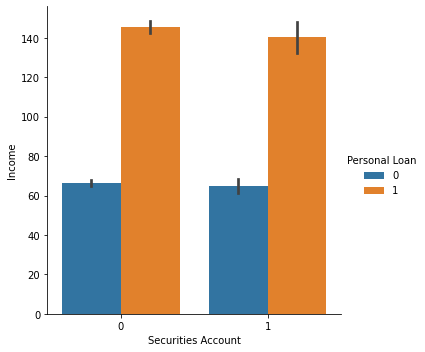

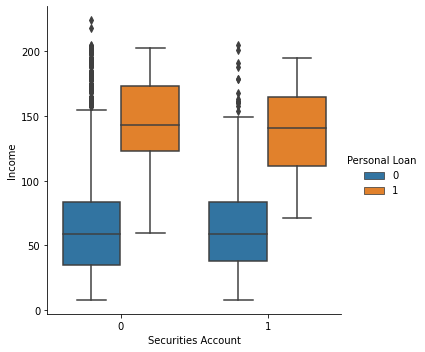

In [1830]:
sns.catplot(data=bank_df, kind="bar", x="Securities Account", y="Income", hue="Personal Loan")
sns.catplot(data=bank_df, kind="box", x="Securities Account", y="Income", hue="Personal Loan")


# Insight:
From the above distribution of securities account we see that the loan borrowed from the bank is almost same if customer has securities account or not.

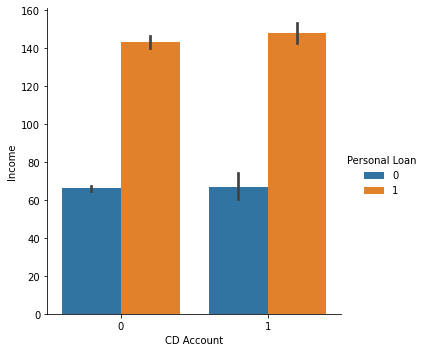

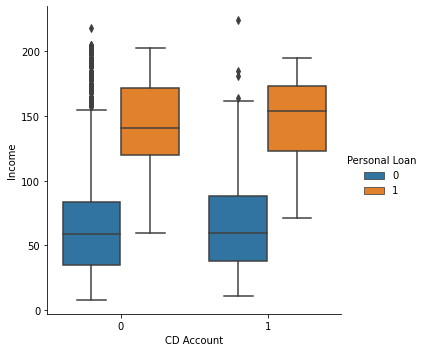

In [1831]:
sns.catplot(data=bank_df, kind="bar", x="CD Account", y="Income", hue="Personal Loan")
sns.catplot(data=bank_df, kind="box", x="CD Account", y="Income", hue="Personal Loan")


# Insight:
From the above distribution of CD account we see that the loan borrowed from the bank is almost same if customer has CD account or not. Box plot shows there are outliers for liability customers.

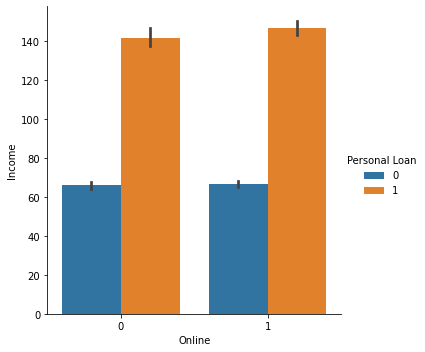

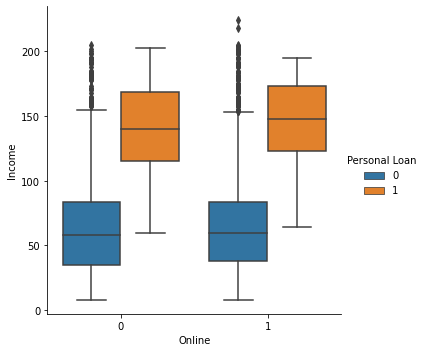

In [1832]:
sns.catplot(data=bank_df, kind="bar", x="Online", y="Income", hue="Personal Loan")
sns.catplot(data=bank_df, kind="box", x="Online", y="Income", hue="Personal Loan")


# Insight:
From the above distribution of online account we see that the loan borrowed from the bank is almost same if customer has online banking account or not. Box plots shows there are outliers for liability customers.

# Question 3. Get the target column distribution. Your comments. ( 2 points)

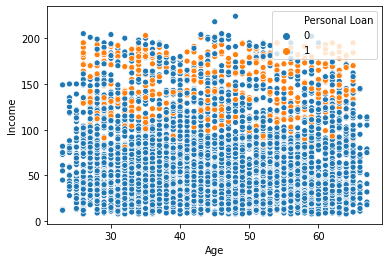

In [1833]:
sns.scatterplot(data=bank_df, x="Age", y="Income", hue="Personal Loan")


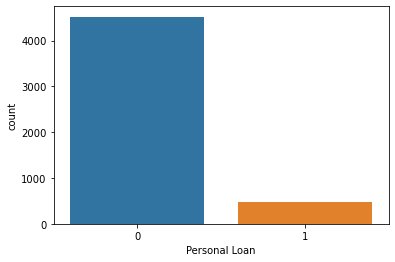

In [1834]:
sns.countplot(x='Personal Loan',data=bank_df)

In [1835]:
bank_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


# Insight:
From all the distribution hue, we see that income is the feature that neatly classify the loan. People who borrow
are more than average income people.
There are more examples of liability customers than borrowed customers.

In [1836]:
#bank_df[bank_df['Experience']<0]=0
#Replacing negative experience with 0 experience
print("Experience with negative values before handling",bank_df[bank_df['Experience']<0].count().any())
bank_df.loc[(bank_df.Experience < 0),'Experience']=0
print("Experience with negative values after handling",bank_df[bank_df['Experience']<0].count().any())
print("Any Duplicate values ?",bank_df[bank_df.duplicated()==True])

Experience with negative values before handling True
Experience with negative values after handling False
Any Duplicate values ? Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [1837]:
#Dropping personal loan - target column and id - not necessary
X = bank_df.drop(labels=['Personal Loan','ID','ZIP Code'], axis=1)
Y = bank_df['Personal Loan']
print(X.shape,Y.shape)
#X #Y

(5000, 11) (5000,)


# Question 4. Split the data into training and test set in the ratio of 70:30 respectively ( 1 point)

In [1838]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=10)

In [1839]:
print("-------------------TRAINING DATA-----------------------")
print("# of rows and independent features in training data : ",x_train.shape)
print("# of rows in target column of training data         : ",y_train.shape)
print("# of rows in target column (groupby personal loan)  : ",y_train.groupby(y_train).count())
print("-------------------TESTING DATA-----------------------")
print("# of rows and independent features in testing data  : ",x_test.shape)
print("# of rows in target column of training data         : ",y_test.shape)
print("# of rows in target column (groupby personal loan)  : ",y_test.groupby(y_test).count())

-------------------TRAINING DATA-----------------------
# of rows and independent features in training data :  (3500, 11)
# of rows in target column of training data         :  (3500,)
# of rows in target column (groupby personal loan)  :  Personal Loan
0    3160
1     340
Name: Personal Loan, dtype: int64
-------------------TESTING DATA-----------------------
# of rows and independent features in testing data  :  (1500, 11)
# of rows in target column of training data         :  (1500,)
# of rows in target column (groupby personal loan)  :  Personal Loan
0    1360
1     140
Name: Personal Loan, dtype: int64


# Question 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (10 points)

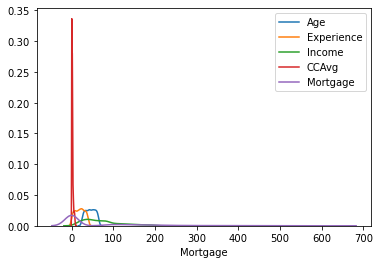

In [1840]:
sns.distplot(x_train['Age'],hist=False,label='Age')
sns.distplot(x_train['Experience'],hist=False,label='Experience')
sns.distplot(x_train['Income'],hist=False,label='Income')
sns.distplot(x_train['CCAvg'],hist=False,label='CCAvg')
sns.distplot(x_train['Mortgage'],hist=False,label='Mortgage')

In [1841]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x_train['Age'] = pt.fit_transform(x_train[['Age']])             
x_train['Experience'] = pt.fit_transform(x_train[['Experience']])       
x_train['Income'] = pt.fit_transform(x_train[['Income']])           
x_train['CCAvg'] =   pt.fit_transform(x_train[['CCAvg']])     
x_train['Mortgage'] =  pt.fit_transform(x_train[['Mortgage']])

x_test['Age'] = pt.transform(x_test[['Age']])             
x_test['Experience'] = pt.transform(x_test[['Experience']])       
x_test['Income'] = pt.transform(x_test[['Income']])           
x_test['CCAvg'] =   pt.transform(x_test[['CCAvg']])     
x_test['Mortgage'] =  pt.transform(x_test[['Mortgage']])

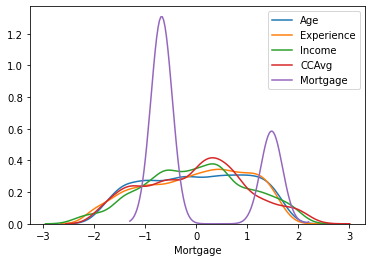

In [1842]:
sns.distplot(x_train['Age'],hist=False,label='Age')
sns.distplot(x_train['Experience'],hist=False,label='Experience')
sns.distplot(x_train['Income'],hist=False,label='Income')
sns.distplot(x_train['CCAvg'],hist=False,label='CCAvg')
sns.distplot(x_train['Mortgage'],hist=False,label='Mortgage')

In [1843]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_x_train = sc.fit_transform(x_train)
#sc_x_test = sc.transform(x_test)

In [1844]:
#Building the KNN model by considering equal weightage to all points and distance metric as eucledian by default
from sklearn.neighbors import KNeighborsClassifier
#train_accuracy_plot = np.empty(40)
#test_accuracy_plot = np.empty(40)
neighbors = []
train_accuracy_plot = []
test_accuracy_plot = []
for i in range(1,40):
    train = []
    test = []
    for j in range(20):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        sc_x_train = sc.fit_transform(x_train)
        sc_x_test = sc.transform(x_test)
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(sc_x_train,y_train)
        train.append(knn.score(sc_x_train,y_train))
        test.append(knn.score(sc_x_test,y_test))
    neighbors.append(i)
    if i == 3: #to get the predicted value when neighbors is 3, thats when the model kinda gives better accuracy
        y_predict1 = knn.predict(sc_x_test)
    #print(i)
    train_accuracy_plot.append(np.mean(train))
    test_accuracy_plot.append(np.mean(test))
    



In [1845]:
print("iteration\tTraining Accuracy\tTesting Accuracy")

for i in range(len(train_accuracy_plot)):
    print(i,"\t\t",train_accuracy_plot[i],"\t\t\t",test_accuracy_plot[i])

#print(max(test_accuracy_plot))

iteration	Training Accuracy	Testing Accuracy
0 		 1.0 			 0.9583333333333333
1 		 0.9700142857142857 			 0.9523333333333334
2 		 0.9771428571428572 			 0.9602999999999998
3 		 0.9649142857142856 			 0.9528666666666668
4 		 0.9706285714285714 			 0.9576333333333334
5 		 0.9620285714285712 			 0.9517666666666666
6 		 0.9658285714285713 			 0.9561666666666666
7 		 0.9584285714285713 			 0.9502
8 		 0.9615285714285713 			 0.9535333333333333
9 		 0.9549857142857144 			 0.9490000000000001
10 		 0.9580285714285713 			 0.9515666666666667
11 		 0.9530999999999998 			 0.9473999999999998
12 		 0.9556571428571428 			 0.9496000000000002
13 		 0.9509714285714285 			 0.9459333333333333
14 		 0.9528571428571428 			 0.9479
15 		 0.9485857142857144 			 0.9445666666666666
16 		 0.9501142857142858 			 0.9461666666666668
17 		 0.9467142857142857 			 0.9435333333333334
18 		 0.948457142857143 			 0.9448666666666666
19 		 0.9448714285714288 			 0.9420999999999997
20 		 0.9466428571428572 			 0.94393333333333

In [1846]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 

lr_train = []
lr_test = []
lr_random = []
for j in range(1,20):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        sc_x_train = sc.fit_transform(x_train)
        sc_x_test = sc.transform(x_test)
        lr.fit(sc_x_train,y_train)
        lr_random.append(j)
        lr_train.append(lr.score(sc_x_train,y_train))
        lr_test.append(lr.score(sc_x_test,y_test))
    
ypredict2=lr.predict(sc_x_test)


In [1847]:
print("Random state\tTraining Accuracy\tTesting Accuracy")

for i in range(len(lr_train)):
    print(lr_random[i],"\t\t",lr_train[i],"\t\t\t",lr_test[i])

Random state	Training Accuracy	Testing Accuracy
1 		 0.9531428571428572 			 0.9486666666666667
2 		 0.9537142857142857 			 0.9406666666666667
3 		 0.9537142857142857 			 0.9486666666666667
4 		 0.9531428571428572 			 0.95
5 		 0.9525714285714286 			 0.9526666666666667
6 		 0.9528571428571428 			 0.956
7 		 0.9525714285714286 			 0.9546666666666667
8 		 0.954 			 0.9486666666666667
9 		 0.9531428571428572 			 0.952
10 		 0.9505714285714286 			 0.9526666666666667
11 		 0.9514285714285714 			 0.9526666666666667
12 		 0.954 			 0.9453333333333334
13 		 0.95 			 0.96
14 		 0.9517142857142857 			 0.9513333333333334
15 		 0.9505714285714286 			 0.9566666666666667
16 		 0.9534285714285714 			 0.9526666666666667
17 		 0.9491428571428572 			 0.9586666666666667
18 		 0.9517142857142857 			 0.958
19 		 0.9545714285714286 			 0.9493333333333334


In [1848]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb_train = []
nb_test = []
nb_random = []
for j in range(1,20):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        sc_x_train = sc.fit_transform(x_train)
        sc_x_test = sc.transform(x_test)
        nb.fit(sc_x_train,y_train)
        nb_random.append(j)
        nb_train.append(lr.score(sc_x_train,y_train))
        nb_test.append(lr.score(sc_x_test,y_test))

        
y_predict3=nb.predict(sc_x_test)
#print(nb.score(sc_x_test,y_test))
#print(nb.score(sc_x_train,y_train))


In [1849]:
print("iteration\tTraining Accuracy\tTesting Accuracy")

for i in range(len(nb_train)):
    print(nb_random[i],"\t\t",nb_train[i],"\t\t\t",nb_test[i])

iteration	Training Accuracy	Testing Accuracy
1 		 0.9542857142857143 			 0.9486666666666667
2 		 0.956 			 0.946
3 		 0.9542857142857143 			 0.9486666666666667
4 		 0.9537142857142857 			 0.9513333333333334
5 		 0.952 			 0.954
6 		 0.9517142857142857 			 0.956
7 		 0.9517142857142857 			 0.9566666666666667
8 		 0.954 			 0.9506666666666667
9 		 0.9528571428571428 			 0.954
10 		 0.9514285714285714 			 0.954
11 		 0.9534285714285714 			 0.954
12 		 0.9537142857142857 			 0.95
13 		 0.9491428571428572 			 0.9633333333333334
14 		 0.9534285714285714 			 0.954
15 		 0.9522857142857143 			 0.956
16 		 0.9534285714285714 			 0.9513333333333334
17 		 0.948 			 0.9633333333333334
18 		 0.9497142857142857 			 0.9606666666666667
19 		 0.9545714285714286 			 0.9493333333333334


# Question 6. Print the confusion matrix for all the above models (5 points)

In [1850]:
from sklearn.metrics import classification_report,confusion_matrix

print("KNN")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict1))
print("Classificatin Report")
print(classification_report(y_test,y_predict1))

print("Logistic Regression")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict2))
print("Classificatin Report")
print(classification_report(y_test,y_predict2))

print("Naive Bayes")
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict3))
print("Classificatin Report")
print(classification_report(y_test,y_predict3))

KNN
Confusion Matrix
[[1336   12]
 [  60   92]]
Classificatin Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1348
           1       0.88      0.61      0.72       152

    accuracy                           0.95      1500
   macro avg       0.92      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

Logistic Regression
Confusion Matrix
[[1335   13]
 [  63   89]]
Classificatin Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1348
           1       0.87      0.59      0.70       152

    accuracy                           0.95      1500
   macro avg       0.91      0.79      0.84      1500
weighted avg       0.95      0.95      0.94      1500

Naive Bayes
Confusion Matrix
[[1230  118]
 [  64   88]]
Classificatin Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1348
      

In [1851]:
#nb.predict_proba(sc_x_test)

# Insight:
The F1 scores of liability customers are better than borrowed customers because the no. of samples of liability customers in 
data set is more than borrowed customers.

By comparing the F1 scores of three classifiers, KNN and Logistic regression predicts better and gives better accuracy than the Naive Bayes model.

Here in case of banks problem of wanting to convert liability customers to borrow customers, False negative (Identifying as liability customer but actually borrowed customer) might be costly so we can maximize the recall.


# Question 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

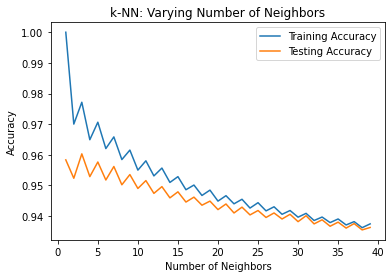

In [1852]:
from matplotlib import pyplot as plt

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Insight:
Gives better testing accuracy when KNN neighbor is 3 can be identified from the above accuracy curve

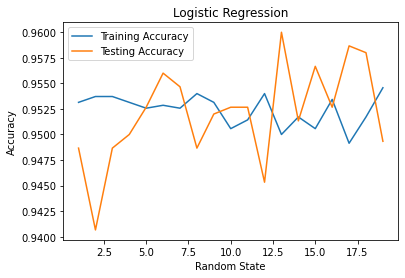

In [1853]:
plt.title('Logistic Regression')
plt.plot(lr_random, lr_train, label = 'Training Accuracy')
plt.plot(lr_random, lr_test, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.show()

# Insight:
For Logistic regression accuracy curve is plotted agaist random state and shows better testing accuracy when random state is around 13

In [1854]:
from sklearn.model_selection import validation_curve

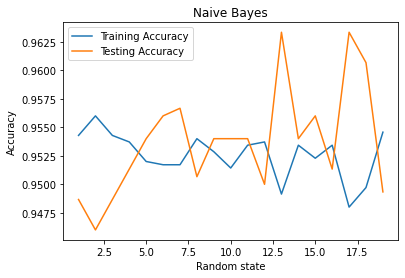

In [1855]:
plt.title('Naive Bayes')
plt.plot(nb_random, nb_train, label = 'Training Accuracy')
plt.plot(nb_random, nb_test, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Random state')
plt.ylabel('Accuracy')
plt.show()

# Insight:
For Naive Bayes accuracy curve is plotted agaist random state and shows better testing accuracy when random state is around 13 and around 16

knn: 0.301641 (0.100230)
lr: 0.689311 (0.065916)
nb: 0.481252 (0.076239)


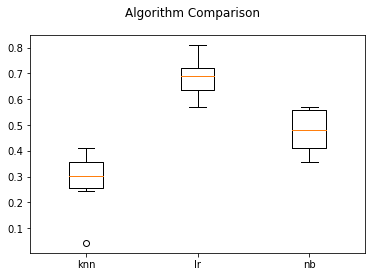

In [1856]:
from sklearn import model_selection

models = []
models.append(('knn', knn))
models.append(('lr', lr))
models.append(('nb', nb))

results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=42)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The above box plot of model comparision shows logistic regression to be the better model among the three.
From the accuracy of the three model and from the F1 score we say that both KNN and logistic regression are better models wheareas naive bayes performs little low.

